In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv(r'C:\Cursos\Analise_de_dados\Cases\Ações da Magalu\Vase_004 - Magalu - Sem Resolução.xlsx - Tab_Dados.csv')
data1['Data'] = pd.DatetimeIndex(data1['Data'])
data1['Maior'] = pd.to_numeric(data1['Maior'].apply(lambda line: float(line.replace(',','.'))))
data1['Menor'] = pd.to_numeric(data1['Menor'].apply(lambda line: float(line.replace(',','.'))))
data1['Abertura'] = pd.to_numeric(data1['Abertura'].apply(lambda line: float(line.replace(',','.'))))
data1['Fechamento'] = pd.to_numeric(data1['Fechamento'].apply(lambda line: float(line.replace(',','.'))))
data1['Adj Close'] = pd.to_numeric(data1['Adj Close'].apply(lambda line: float(line.replace(',','.'))))
data = data1.set_index('Data')

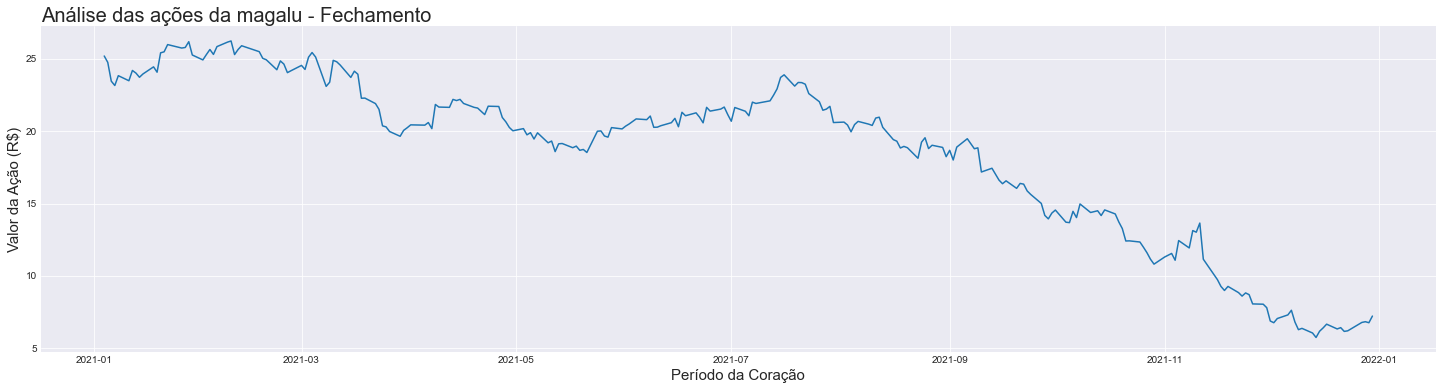

In [3]:
# Analises das Ações Pelo Tempo
plt.style.use('seaborn-darkgrid')
plt.figure( figsize=(25, 6) )
plt.title('Análise das ações da magalu - Fechamento', fontsize=20, loc='left', pad=3)
plt.plot(data.index, data['Fechamento'])

plt.xlabel('Período da Coração', size=15)
plt.ylabel('Valor da Ação (R$)', size=15)
plt.show()

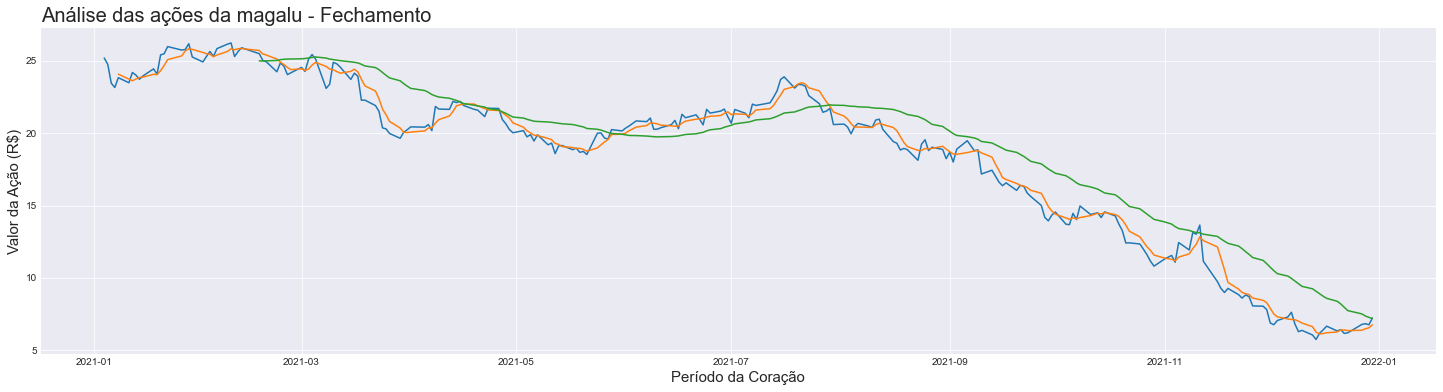

In [4]:
media_movel = data['Fechamento'].rolling(5).mean()
media_tendencia = data['Fechamento'].rolling(30).mean()

plt.style.use('seaborn-darkgrid')
plt.figure( figsize=(25, 6) )
plt.title('Análise das ações da magalu - Fechamento', fontsize=20, loc='left')

plt.plot( data.index, data['Fechamento'] )
plt.plot( data.index, media_movel )
plt.plot( data.index, media_tendencia )

plt.xlabel('Período da Coração', size=15)
plt.ylabel('Valor da Ação (R$)', size=15)
plt.show()

In [5]:
Grafico = go.Figure(
    data=[
          go.Candlestick(
              x= data.index,
              open = data['Abertura'],
              high = data['Maior'],
              low = data['Menor'],
              close = data['Fechamento'],
          )
    ]
)

Grafico.update_layout( xaxis_rangeslider_visible=False )
Grafico.show()